## What is a color map?

* A color map is a function from *input values* to *colors* used for plotting. 
* The *input values* might be discrete, e.g., `{1, 2, 3, 4}` or continuous, e.g, `[0.0 .. 1000.0]`
* The colors might be simply grayscale brightness, or an RGB triplet (or HSV, or ...)
* The colors might be used for an image, or for a collection of lines, symbols, etc.

## Types of color map

* Sequential maps – for unsigned scalar values, e.g., brightness
* Divergent maps – for signed scalar values, e.g., relative velocity
* Categorical maps – for a collection of unordered items, e.g., different galaxies
* Circular maps – for values that wrap around continuously, e.g., angles

## Sequential maps

### Most desirable property: 
> *Monotonic mapping between value and color brightness*

Why?  Because brightness is the aspect of color that we intuitively understand.  We want to leverage all the good work that evolution has done in designing our visual system. 

### Classic example:
> *simple grayscale*

In many cases, grayscale is the best pick.

In [37]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from astropy.io import fits
sns.set_context('poster')

hdu = fits.open("data/OrionS-Rubin-WFC3-F658N.fits")[0]
data = hdu.data[0:1000, 0:1000]

In [42]:
def imshow(cmap):
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(data, origin="lower", 
              vmin=0, vmax=20.0, 
              interpolation="none", cmap=cmap)
    fig.colorbar(im, ax=ax)

### Example grayscale image

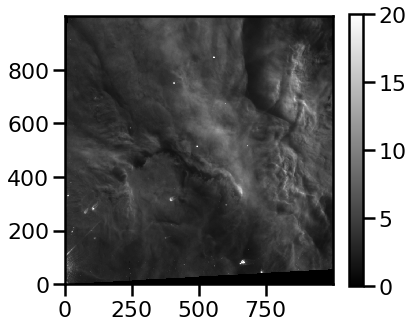

In [43]:
imshow("gray")

### Example negative grayscale image

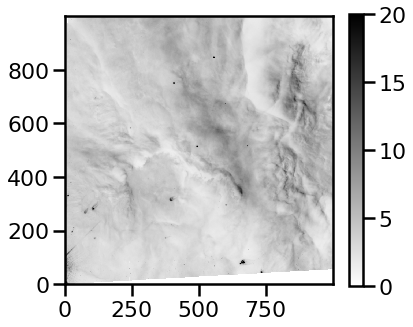

In [44]:
imshow("gray_r")

Note that the positive grayscale accentuates the brighter regions, while the negative grayscale accentuates the fainter regions.  

### Other desirable properties

> *Perceptually uniform*

Equal changes in input values produce equal changes in color. 

> *More than just brightness varies across the scale*

For instance, hue or saturation might change.  This makes it easier to *pick off* a particular value.

### Examples of perceptually uniform sequential color maps

For more info, see the [Choosing Colormaps in Matplotlib](http://matplotlib.org/tutorials/colors/colormaps.html) tutorial. 

#### Viridis

We lose a little in contrast, but the qualitative blue–green–yellow variation allows us to better cross-reference with the colorbar to see the approximate values of the individual pixels. 

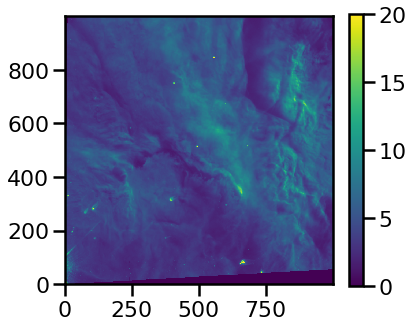

In [45]:
imshow("viridis")

### Inferno

I like this one better.

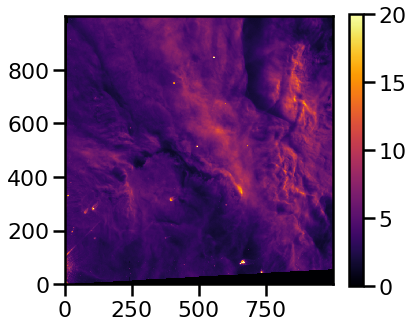

In [49]:
imshow("inferno")

### Cividis

This is optimized with consideration for people with red–green color vision deficiency.  See paper by [Nuñez et al. (2018)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0199239)

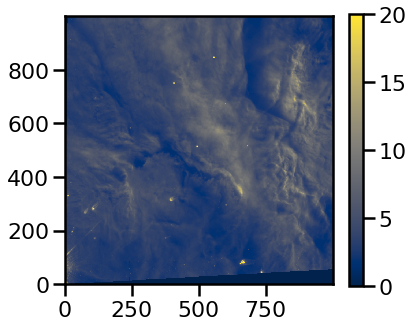

In [48]:
imshow("cividis")

### What not to do

> *Never ever use the `jet` color map*

Not perceptually uniform.  Not even monotonic in brightness.  There are scientific studies that prove that this color map is **bad**

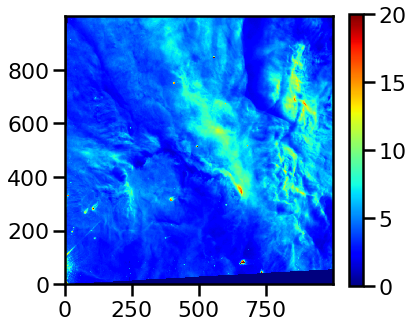

In [50]:
imshow("jet")